# Visualizando Datos Series de tiempo de Precios del mercado

http://byteacademy.co/blog/time-series-python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Definiendo periodo de captura de datos

In [2]:
start = pd.to_datetime("2012-01-01")
end = pd.to_datetime("2018-03-27")

## Usando Quandl

In [3]:
import  quandl 

### Obteniendo datos de Delta, Jet Blue y Westsouth

In [4]:
delta = quandl.get("WIKI/DAL",start_date=start,end_date=end)
jb = quandl.get("WIKI/JBLU",start_date=start,end_date=end)
sw =  quandl.get("WIKI/LUV",start_date=start,end_date=end)

### Datos de las 3 aerolineas

In [5]:
delta.head()

Open  High   Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                        
2012-01-03  8.23  8.30  8.02   8.04   7093200.0          0.0          1.0   
2012-01-04  8.03  8.14  7.83   8.01   7412900.0          0.0          1.0   
2012-01-05  8.03  8.35  7.87   8.33  10509800.0          0.0          1.0   
2012-01-06  8.26  8.43  8.24   8.32   6683300.0          0.0          1.0   
2012-01-09  8.34  8.50  8.26   8.28   9015700.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2012-01-03   7.799097   7.865431  7.600092    7.619044    7093200.0  
2012-01-04   7.609568   7.713809  7.420040    7.590615    7412900.0  
2012-01-05   7.609568   7.912814  7.457945    7.893861   10509800.0  
2012-01-06   7.827526   7.988625  7.808573    7.884384    6683300.0  
2012-01-09   7.903337   8.054960  7.827526    7.846479    9015700.0

In [6]:
jb.head()

Open   High   Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                        
2012-01-03  5.33  5.400  5.05   5.12  4520200.0          0.0          1.0   
2012-01-04  5.13  5.240  5.04   5.23  3648000.0          0.0          1.0   
2012-01-05  5.19  5.420  5.05   5.42  6118900.0          0.0          1.0   
2012-01-06  5.40  5.480  5.31   5.45  4447900.0          0.0          1.0   
2012-01-09  5.46  5.545  5.43   5.53  8325400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2012-01-03       5.33      5.400      5.05        5.12    4520200.0  
2012-01-04       5.13      5.240      5.04        5.23    3648000.0  
2012-01-05       5.19      5.420      5.05        5.42    6118900.0  
2012-01-06       5.40      5.480      5.31        5.45    4447900.0  
2012-01-09       5.46      5.545      5.43        5.53    8325400.0

In [7]:
sw.head()

Open  High   Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                       
2012-01-03  8.72  8.76  8.41   8.41  8808600.0          0.0          1.0   
2012-01-04  8.41  8.61  8.22   8.60  7582700.0          0.0          1.0   
2012-01-05  8.57  8.64  8.39   8.62  4892200.0          0.0          1.0   
2012-01-06  8.63  8.70  8.52   8.52  3046800.0          0.0          1.0   
2012-01-09  8.52  8.68  8.52   8.59  2906900.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2012-01-03   8.361841   8.400198  8.064574    8.064574    8808600.0  
2012-01-04   8.064574   8.256359  7.882378    8.246770    7582700.0  
2012-01-05   8.218002   8.285127  8.045395    8.265948    4892200.0  
2012-01-06   8.275538   8.342662  8.170056    8.170056    3046800.0  
2012-01-09   8.170056   8.323484  8.170056    8.237181    2906900.0

Las columnas que importan analizar son Adj. Close y Volume.

## Visualizando

### Graficar Ajuste de precio de cierre

Se va a graficar el Ajuste de precio de cierre de las 3 aerolineas.

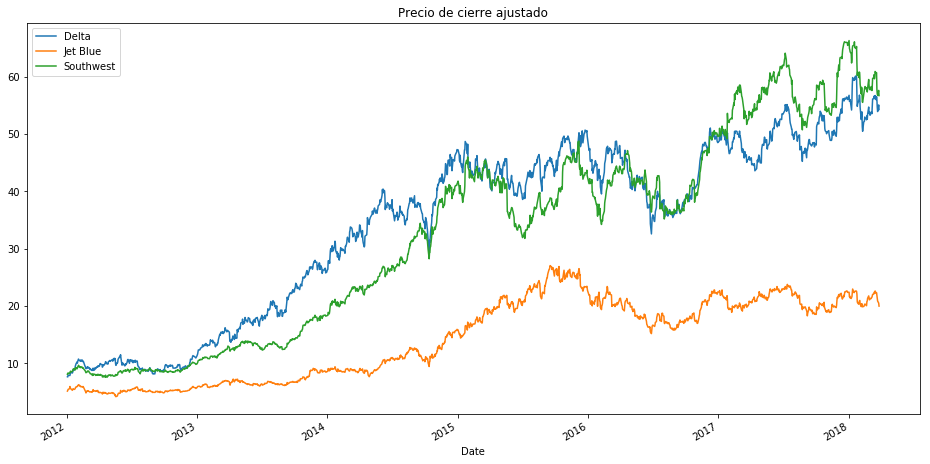

In [8]:
delta["Adj. Close"].plot(label="Delta",figsize=(16,8),title="Precio de cierre ajustado")
jb["Adj. Close"].plot(label="Jet Blue")
sw["Adj. Close"].plot(label="Southwest")
plt.legend();

### Graficar el Volumen (Volume)

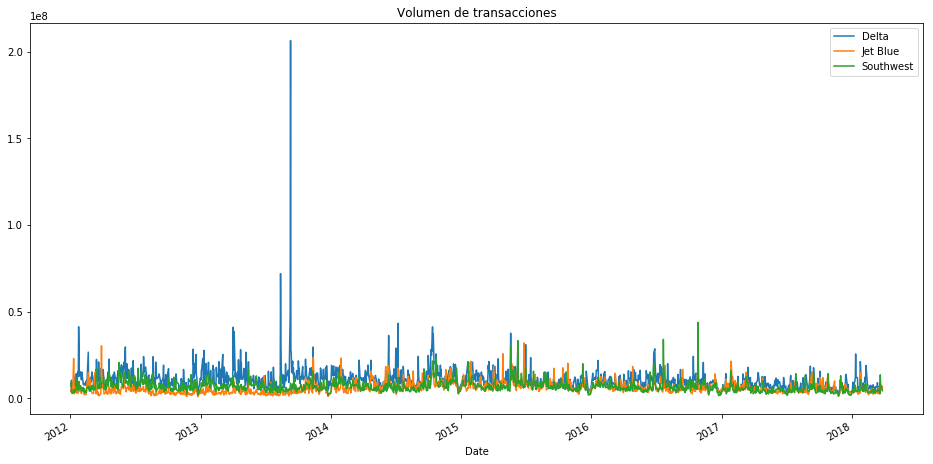

In [9]:
delta["Volume"].plot(label="Delta",figsize=(16,8),title="Volumen de transacciones")
jb["Volume"].plot(label="Jet Blue")
sw["Volume"].plot(label="Southwest")
plt.legend();

Se puede notar que la aerolinea Delta tiene un pico muy alto en algún momento del año 2013.

Para obtener la fecha se usa el método idxmax

In [10]:
delta["Volume"].idxmax()

Timestamp('2013-09-10 00:00:00')

Como se puede ver, la fecha es el 10 de Septiembre de 2013. En esa fecha el equipo de la NFL de Seatle hizo
el anuncio de asociación con Delta.
https://web.archive.org/web/20150216010004/http://news.delta.com/2013-09-10-Seahawks-and-Sounders-FC-Announce-New-Partnership-with-Delta-Air-Lines

### Movimientos promedios  MA

Los movimientos promedios se usan para detectar oportunidades de trading. 

Este cálculo se toma de la media o promedio de los pasados precios (se llama movimientos promedio por que
los datos están continuamente moviendose).

Dependiendo del tipo de inversor (alto riesgo vs bajo riesgo, corto término vs largo término), se pueden
ajustar los movimientos promedio a 10 días, 20 días, 50 días, 200 días, 1 año, 5 años, etc. 

Para este caso se calculará el movimiento promedio a 50 días y a 200 días.

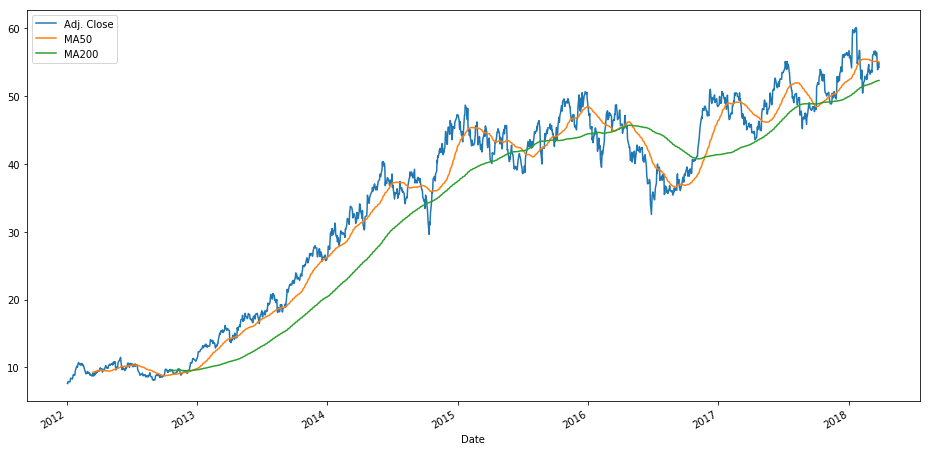

In [11]:
delta["MA50"] = delta["Adj. Close"].rolling(50).mean()
delta["MA200"] = delta["Adj. Close"].rolling(200).mean()
delta[["Adj. Close",'MA50','MA200']].plot(label="DAL",figsize=(16,8));

Se nota la diferencia entre los MA de 50 y 200 días, con el ajuste de cierre diario.  Con esto se pude 
decidir el momento de realizar una compra o venta. 